# KNN : k- nearest neighbor

1. KNN is a supervised machine learning algorithm. It works by finding the "k" closest data points (neighbors) to a given input and makes a predictions based on the majority class (for classification) or the average value (for regression).
2. K-Nearest Neighbors is also called as a lazy learner algorithm because it does not learn from the training set immediately instead it stores the entire dataset and performs computations only at the time of classification


In [25]:
import numpy as np
from collections import Counter

class KNN:
    def __init__(self, k=3):
        self.k = k

    def euclidean_distance(self,a,b):
        a = np.array(a)
        b = np.array(b)
        return np.sqrt(np.sum((a-b)**2))

    def fit(self, X, y):
        self.X_train = np.array(X)
        self.y_train = np.array(y)

    def predict(self, X):
        X = np.array(X)
        preds = [self.predict_single(x) for x in X]
        return np.array(preds)

    def predict_single(self, x):
        distance = [self.euclidean_distance(x, x_train) for x_train in self.X_train]

        k_indices = np.argsort(distance)[:self.k]
        k_nearest_labels = self.y_train[k_indices]

        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]

    

In [26]:
class0 = np.random.randn(100, 2) + np.array([2, 2])

class1 = np.random.randn(100, 2) + np.array([6, 6])

X = np.vstack([class0, class1])
y = np.array([0]*100 + [1]*100)

# Shuffle
indices = np.random.permutation(len(X))
X = X[indices]
y = y[indices]

In [27]:
train_size = 160   # 80% data
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [28]:
model = KNN(k=5)
model.fit(X_train, y_train)

In [29]:
preds = model.predict(X_test)

In [30]:
accuracy = np.mean(preds == y_test)
print("Test Accuracy:", accuracy)
print("Predictions:", preds)
print("True labels:", y_test)

Test Accuracy: 1.0
Predictions: [1 0 1 0 1 0 0 1 1 0 1 0 1 0 1 1 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 0 1 1 1 1 0
 1 1 1]
True labels: [1 0 1 0 1 0 0 1 1 0 1 0 1 0 1 1 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 0 1 1 1 1 0
 1 1 1]


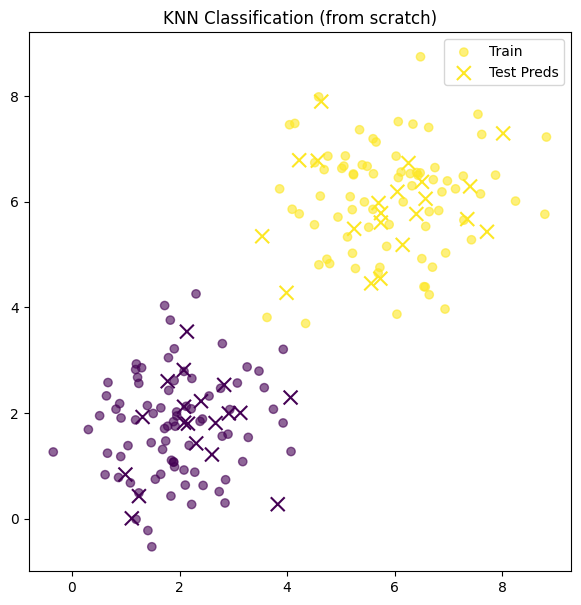

In [32]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7, 7))
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, alpha=0.6, label="Train")
plt.scatter(X_test[:,0], X_test[:,1], c=preds, marker='x', s=100, label="Test Preds")
plt.legend()
plt.title("KNN Classification (from scratch)")
plt.show()